In [2]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score


In [3]:
def convert_num(datframe, col_name):
    datframe[col_name] = datframe[col_name].convert_objects(convert_numeric=True)
def remove_per(col, dataframes):
    dataframes[col] = dataframes[col].map(lambda x:x.rstrip('%'))
def convert_num(datframe, col_name):
    datframe[col_name] = datframe[col_name].convert_objects(convert_numeric=True)

In [4]:
DATA_PATH_SAT = "/home/xiaohang/Desktop/59970/project/data science new topic/SAT_Results.csv"
DATA_PATH_ATT = "/home/xiaohang/Desktop/59970/project/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11.csv"
DATA_PATH_OUTC = "/home/xiaohang/Desktop/59970/project/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
DATA_PATH_SIZE = "/home/xiaohang/Desktop/59970/project/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
DATA_PATH_Sch = '/home/xiaohang/Desktop/59970/project/data science new topic/School_Progress_Report_2010-2011.csv'

In [5]:
r_sat = pd.read_csv(DATA_PATH_SAT)
r_att = pd.read_csv(DATA_PATH_ATT)
r_outc = pd.read_csv(DATA_PATH_OUTC)
r_sch_grade = pd.read_csv(DATA_PATH_Sch)
r_size = pd.read_csv(DATA_PATH_SIZE)

In [6]:
print(r_sat.dtypes,
r_att.dtypes,
r_outc.dtypes,
r_sch_grade.dtypes, 
r_size.dtypes)

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object District                  object
YTD % Attendance (Avg)    object
YTD Enrollment(Avg)        int64
dtype: object Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n            

## SAT data clean

In [7]:
sub_sat = r_sat.loc[:, {"DBN", 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score'}]
sub_sat.head()

,SAT Critical Reading Avg. Score,DBN,SAT Math Avg. Score,SAT Writing Avg. Score
0,355,01M292,404,363
1,383,01M448,423,366
2,377,01M450,402,370
3,414,01M458,401,359
4,390,01M509,433,384


In [8]:
convert_num(sub_sat, 'SAT Math Avg. Score')
convert_num(sub_sat, 'SAT Writing Avg. Score')
convert_num(sub_sat, 'SAT Critical Reading Avg. Score')
sub_sat['SAT Avg. Score']= sub_sat.sum(axis = 1)
sub_sat.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,SAT Critical Reading Avg. Score,DBN,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score
0,355.0,01M292,404.0,363.0,1122.0
1,383.0,01M448,423.0,366.0,1172.0
2,377.0,01M450,402.0,370.0,1149.0
3,414.0,01M458,401.0,359.0,1174.0
4,390.0,01M509,433.0,384.0,1207.0


## ATTENDANCE data clean

In [9]:
sub_att = r_att.loc[:, {'District','YTD % Attendance (Avg)'}]
sub_att['District']= r_att.apply(lambda x: x['District'].replace('DISTRICT ', ''), axis=1)
sub_att = sub_att.drop([33,34])
remove_per('YTD % Attendance (Avg)', sub_att)
sub_att = sub_att.rename(columns={'YTD % Attendance (Avg)':'Attendance_Avg.'})
sub_att.head()

,Attendance_Avg.,District
0,91.18,01
1,89.01,02
2,89.28,03
3,91.13,04
4,89.08,05


## GRADUATED PERCENTAGE data clean

In [10]:
sub_outc = r_outc[r_outc['Cohort'] == '2006']
sub_outc = sub_outc.loc[:, {'DBN','Total Grads - % of cohort'}]
sub_outc = sub_outc.dropna()
remove_per('Total Grads - % of cohort', sub_outc)
sub_outc = sub_outc.rename(columns={'Total Grads - % of cohort':'Percentage of Grads'})
sub_outc.head()

,Percentage of Grads,DBN
3,55.1,01M292
10,42.7,01M448
17,77.8,01M450
24,56,01M509
31,54.4,01M515


## SCHOOL GRADE data clean

In [11]:
r_sch_grade = r_sch_grade[r_sch_grade["SCHOOL LEVEL*"] == "High School"]
sub_sch_grade = r_sch_grade.loc[:, {'DBN',
                                 'PEER INDEX*',
                                 '2010-2011 OVERALL GRADE',
                                 '2010-2011 ENVIRONMENT GRADE',
                                 '2010-2011 PERFORMANCE GRADE',
                                 '2010-2011 PROGRESS GRADE'}]
sub_sch_grade = sub_sch_grade.rename(columns={'\ufeffDBN':'DBN'})
sub_sch_grade.dropna()
print(len(sub_sch_grade))

sub_sch_grade.head()

426


,DBN,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 PROGRESS GRADE,2010-2011 PERFORMANCE GRADE,2010-2011 ENVIRONMENT GRADE
14,01M292,1.81,C,C,C,D
23,01M448,2.03,C,B,C,D
25,01M450,2.26,A,B,A,A
27,01M509,1.78,C,C,B,D
30,01M539,3.48,A,A,A,C


## SCHOOL SIZE data clean

In [12]:
def add_DBN_to_class(row):
    dbn = "{0:02d}{1}".format(row["CSD"], row["SCHOOL CODE"])
    return dbn
temp_size = r_size[r_size["GRADE "] == '09-12']
temp_size = temp_size[r_size["PROGRAM TYPE"] == 'GEN ED']
sub_cl_size = temp_size.loc[:, {'CSD','BOROUGH','SCHOOL CODE', 'AVERAGE CLASS SIZE'}]
sub_cl_size["DBN"] = sub_cl_size.apply(add_DBN_to_class, axis=1)
sub_cl_size = sub_cl_size.dropna()
sub_cl_size = sub_cl_size.drop(['CSD', 'BOROUGH', 'SCHOOL CODE'], 1)
sub_cl_size = sub_cl_size.drop_duplicates()
sub_cl_size = sub_cl_size.groupby("DBN").agg(np.mean)
sub_cl_size = sub_cl_size.reset_index()
sub_cl_size['District'] = sub_cl_size.apply(lambda x: x['DBN'][0:2], axis=1)
sub_cl_size.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,DBN,AVERAGE CLASS SIZE,District
0,01M292,22.564286,01
1,01M332,22.000000,01
2,01M378,33.000000,01
3,01M448,22.046667,01
4,01M450,21.142857,01


## MERGE ALL DATASETS

In [13]:
comb =  pd.merge(sub_att, sub_cl_size, how='inner', on='District')

In [14]:
comb2 = pd.merge(sub_outc, sub_sat, how='inner', on='DBN')
comb3 = pd.merge(sub_sch_grade, comb, how='inner', on='DBN')
comb_final = pd.merge(comb2, comb3, how='inner', on='DBN')
comb_final = comb_final[comb_final['Percentage of Grads'] != 's']
print(len(comb_final))
comb_final.head()

2447


,Percentage of Grads,DBN,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,SAT Avg. Score,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 PROGRESS GRADE,2010-2011 PERFORMANCE GRADE,2010-2011 ENVIRONMENT GRADE,Attendance_Avg.,District,AVERAGE CLASS SIZE
0,55.1,01M292,355.0,404.0,363.0,1122.0,1.81,C,C,C,D,91.18,01,22.564286
2,54.8,01M292,355.0,404.0,363.0,1122.0,1.81,C,C,C,D,91.18,01,22.564286
4,63.3,01M292,355.0,404.0,363.0,1122.0,1.81,C,C,C,D,91.18,01,22.564286
6,66.7,01M292,355.0,404.0,363.0,1122.0,1.81,C,C,C,D,91.18,01,22.564286
7,40.5,01M292,355.0,404.0,363.0,1122.0,1.81,C,C,C,D,91.18,01,22.564286


In [15]:
comb_final.columns

Index(['Percentage of Grads', 'DBN', 'SAT Critical Reading Avg. Score',
       'SAT Math Avg. Score', 'SAT Writing Avg. Score', 'SAT Avg. Score',
       'PEER INDEX*', '2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE',
       '2010-2011 PERFORMANCE GRADE', '2010-2011 ENVIRONMENT GRADE',
       'Attendance_Avg.', 'District', 'AVERAGE CLASS SIZE'],
      dtype='object')

In [16]:
comb_final.dtypes

Percentage of Grads                 object
DBN                                 object
SAT Critical Reading Avg. Score    float64
SAT Math Avg. Score                float64
SAT Writing Avg. Score             float64
SAT Avg. Score                     float64
PEER INDEX*                        float64
2010-2011 OVERALL GRADE             object
2010-2011 PROGRESS GRADE            object
2010-2011 PERFORMANCE GRADE         object
2010-2011 ENVIRONMENT GRADE         object
Attendance_Avg.                     object
District                            object
AVERAGE CLASS SIZE                 float64
dtype: object

In [17]:
grade_dict = {'A': 5,
              'B': 4,
              'C': 3,
              'D': 2,
              'F': 1,}
comb_final = comb_final.replace(to_replace={'2010-2011 OVERALL GRADE': grade_dict, '2010-2011 PERFORMANCE GRADE': grade_dict,
       '2010-2011 OVERALL GRADE': grade_dict, '2010-2011 PROGRESS GRADE': grade_dict, 
       '2010-2011 ENVIRONMENT GRADE': grade_dict})

In [18]:
convert_num(comb_final, 'Percentage of Grads')
convert_num(comb_final, '2010-2011 PERFORMANCE GRADE')
convert_num(comb_final, '2010-2011 OVERALL GRADE')
convert_num(comb_final, '2010-2011 PROGRESS GRADE')
convert_num(comb_final, '2010-2011 ENVIRONMENT GRADE')
convert_num(comb_final, 'Attendance_Avg.')
convert_num(comb_final, 'AVERAGE CLASS SIZE')

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [19]:
comb_final.dtypes

Percentage of Grads                float64
DBN                                 object
SAT Critical Reading Avg. Score    float64
SAT Math Avg. Score                float64
SAT Writing Avg. Score             float64
SAT Avg. Score                     float64
PEER INDEX*                        float64
2010-2011 OVERALL GRADE            float64
2010-2011 PROGRESS GRADE           float64
2010-2011 PERFORMANCE GRADE        float64
2010-2011 ENVIRONMENT GRADE        float64
Attendance_Avg.                    float64
District                            object
AVERAGE CLASS SIZE                 float64
dtype: object

In [20]:
comb_final = comb_final.dropna(axis=0)
len(comb_final)

2304

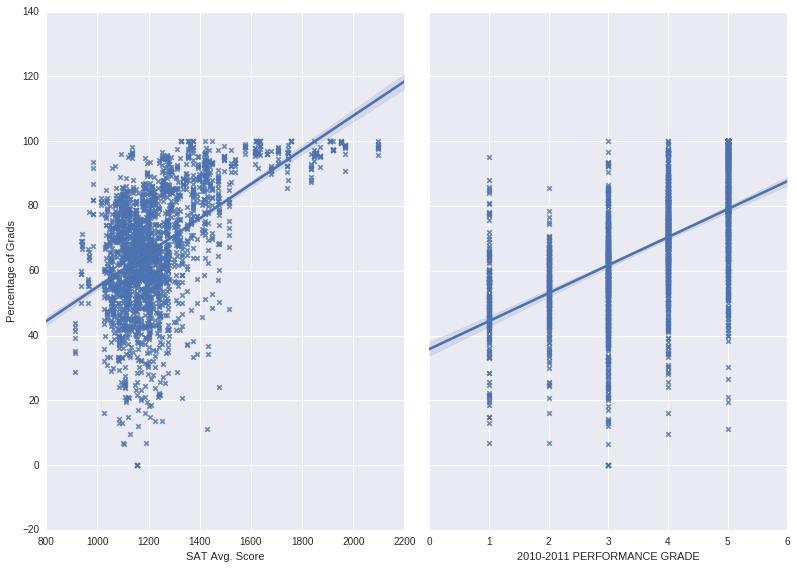

In [21]:
sns.pairplot(comb_final, x_vars=['SAT Avg. Score', '2010-2011 PERFORMANCE GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7, kind='reg', markers = 'x')

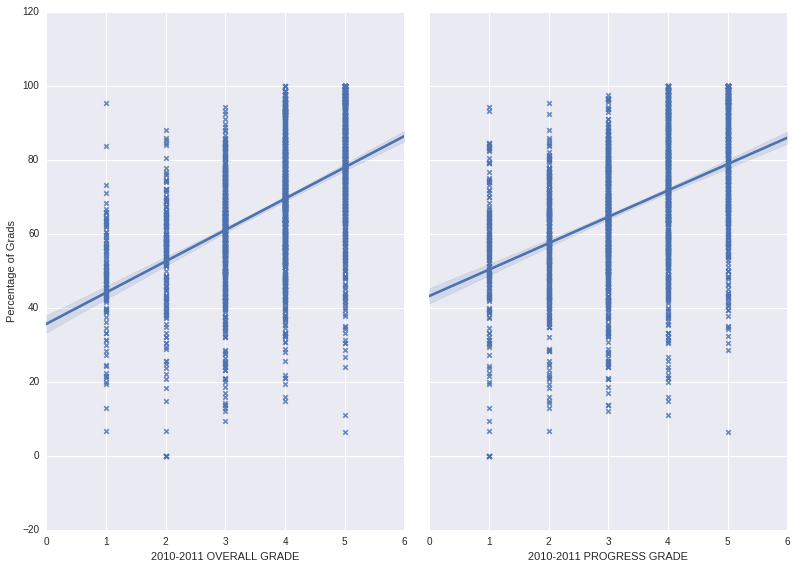

In [22]:
sns.pairplot(comb_final, x_vars=['2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7,kind='reg', markers = 'x')

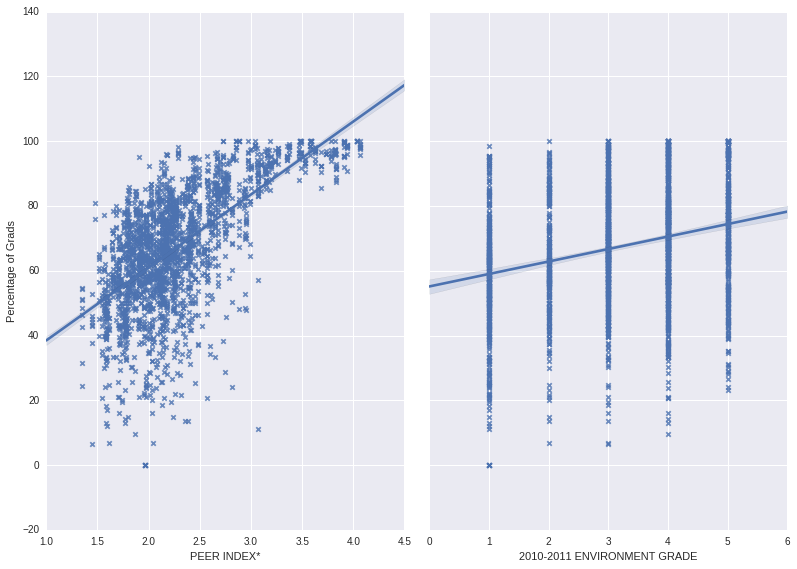

In [23]:
sns.pairplot(comb_final, x_vars=['PEER INDEX*',
       '2010-2011 ENVIRONMENT GRADE'],
             y_vars='Percentage of Grads', size=8, aspect = 0.7,kind='reg', markers = 'x')

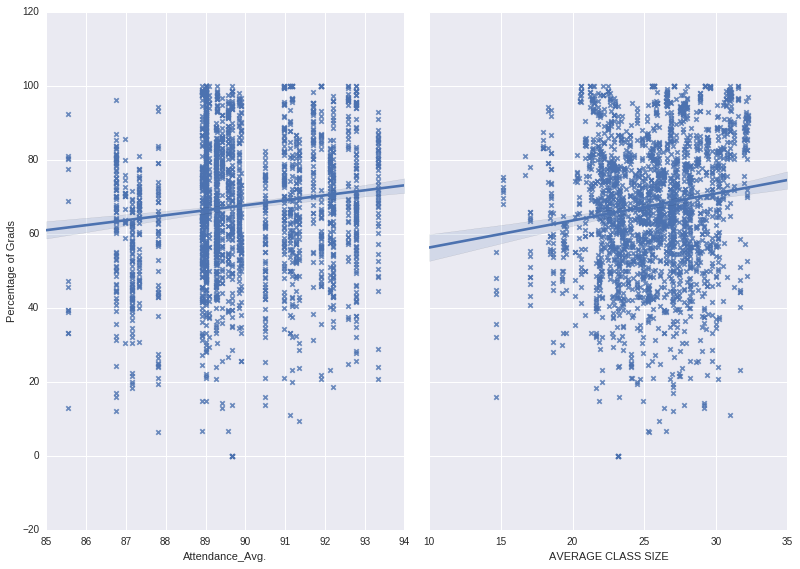

In [24]:
sns.pairplot(comb_final, x_vars=['Attendance_Avg.',
       'AVERAGE CLASS SIZE'],markers = 'x',
             y_vars='Percentage of Grads', size=8, aspect = 0.7,  kind='reg')

## REGRESSION

In [25]:
feature_cols = ['SAT Avg. Score', '2010-2011 PERFORMANCE GRADE',
       '2010-2011 OVERALL GRADE', '2010-2011 PROGRESS GRADE', 'PEER INDEX*',
       '2010-2011 ENVIRONMENT GRADE', 'Attendance_Avg.', 
       'AVERAGE CLASS SIZE']
data_feature = comb_final[feature_cols]
data_target = comb_final['Percentage of Grads']

In [26]:
print(
data_feature.shape,
data_target.shape
)


(2304, 8) (2304,)


## Cross Validation

### linear regression

In [27]:
linear_reg = LinearRegression()
linreg_scores = cross_val_score(linear_reg, data_feature, data_target, cv=10, scoring='mean_squared_error')
mse_linreg_scores = -linreg_scores
rmse_linreg_scores = np.sqrt(mse_linreg_scores)
print(rmse_linreg_scores)
rmse_linreg_scores.mean()

[ 11.49004831  13.27398306  11.95695     10.41754609  10.73068846
  11.65727076  17.66655554  13.83372265  11.49064035  11.69680456]


12.421420977076888

### BayesianRidge

In [28]:
from sklearn.linear_model import BayesianRidge
bay_ridge = BayesianRidge()
bay_ridge_scores = cross_val_score(bay_ridge, data_feature, data_target, cv=10, scoring='mean_squared_error')
mse_bay_ridge_scores = -bay_ridge_scores
rmse_bay_ridge_scores = np.sqrt(mse_bay_ridge_scores)
print(rmse_bay_ridge_scores)
rmse_bay_ridge_scores.mean()

[ 11.50000072  13.26699766  11.97784299  10.40632209  10.71753639
  11.66021374  17.66541498  13.82228393  11.49851114  11.69565662]


12.421078025894962

### Ridge Regression

In [29]:
from sklearn.linear_model import Ridge, RidgeCV
ridge_reg = Ridge(alpha = .1)
ridge_reg_scores = cross_val_score(ridge_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')
rmse_ridge_reg_scores = np.sqrt(-ridge_reg_scores)
rmse_ridge_reg_scores.mean()

12.461002350129993

### Lasso

In [45]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg_scores = cross_val_score(lasso_reg, data_feature, data_target, cv=5, scoring='mean_squared_error')
rmse_lasso_reg_scores = np.sqrt(-lasso_reg_scores)
rmse_lasso_reg_scores.mean()

12.473270973864219

## Predict Graduated percentage by using Linear regression

In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_target, random_state=1)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1728, 8)
(1728,)
(576, 8)
(576,)


In [48]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
linreg.score(X_train, y_train)

0.5701758794398466

In [50]:
linreg.score(X_test, y_test)

0.51316231406295909

In [51]:
predict_grad = linreg.predict(X_test)
predict_grad

array([  57.68131022,   75.67684509,   51.60049482,   73.98364606,
         58.55000433,   74.3357439 ,   91.13801074,   49.94847954,
         61.50248045,   49.04790313,   70.11748321,   57.68131022,
         65.5533913 ,   65.11257273,   73.88471229,   61.98147501,
         64.95237417,   49.35001935,   41.88257291,   42.34159374,
         52.99603242,   72.50225373,   65.20606442,   59.83431991,
         70.46042841,   67.41889829,   74.78547895,   56.18314723,
         53.95047768,   52.67660528,   62.06144919,   93.15510294,
         78.75460953,   54.68537489,   41.37684765,   65.48334385,
         74.28842026,   82.29277749,   75.67684509,   74.78547895,
         55.44575501,   49.35001935,   41.37684765,   60.50745161,
         59.81869505,   68.01456007,   79.11415444,   54.3972274 ,
         54.11344612,   83.17884089,   65.43137891,   63.41270608,
         72.36636622,   40.18040697,   76.67374013,   74.07139399,
         55.33931796,   54.11344612,   74.3357439 ,   54.36879

In [52]:
y_test.values

array([  73. ,   80. ,   71.1,   74.4,   40. ,   74.4,   95.1,   40. ,
         64.8,   47.3,   70.5,   77.5,   77.2,   62.9,   69.4,   65.8,
         69.5,   45.3,   47.1,   62.3,   43. ,   86.7,   71.8,   66.7,
         70.4,   68.8,   95.7,   62. ,   37.8,   59.1,   71.1,   96.8,
         79.7,   59.2,   46.3,   65. ,   88.5,   94.4,   75. ,   62.9,
         57.4,   52. ,   49.1,   50. ,   68.4,   20.7,   61.5,   58.6,
         46.8,   85.4,   39.4,   58.8,   80.5,   45.3,   24. ,   28.6,
         59. ,   40. ,   71.1,   68.4,   81.5,   94.8,   80.8,   68.1,
         74.4,   69.8,   94.7,   64.9,   50. ,   78.6,   73.8,   88.1,
         99.7,   17.1,   55.4,   61.9,   63.2,   60. ,   83.6,   20.9,
         71.4,   63.5,   68.1,   71.7,   67.1,   78.2,   85.4,   33.2,
         50. ,   54.6,   42.9,   66.7,   65.1,   36.4,   97.4,   93.2,
         45.7,   92.9,   21.7,   48.5,   72. ,   40.5,   61.5,   76.6,
         44.1,   81.6,   63.6,   60.6,   60.8,   63.5,    0. ,   42.6,
      

In [53]:
len(predict_grad)

576

In [54]:
len(y_test)

576

In [55]:
predict_x = [i for i in range(576)]
len(predict_x)

576

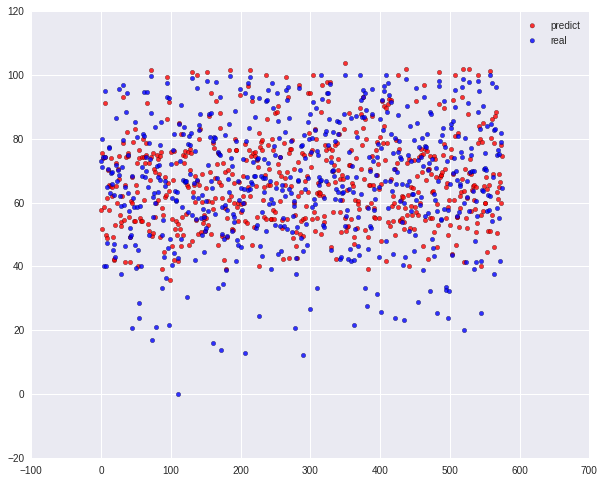

In [56]:
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111)
ax.scatter(predict_x,predict_grad,c='r',label='predict', alpha=0.8)
ax.scatter(predict_x,y_test,c='b',label='real', alpha = 0.8)
ax.legend()